In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE

import warnings

In [3]:
# Omitir FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
df = pd.read_csv('../data/data_procesada_v2.csv')

print(df.head())
print(df.shape)

   edad  sexo  estado  gap  time  peso total     covey  dist camino  Oxalis  \
0   0.0   1.0     0.0  1.0  34.0    0.353654  0.000000     0.048241     0.0   
1   1.0   1.0     0.0  1.0  34.0    0.528703  0.000000     0.048241     0.0   
2   1.0   0.0     0.0  7.0  14.0    0.387277  0.421053     0.344360     0.0   
3   1.0   1.0     0.0  1.0  44.0    0.015023  0.210526     0.313635     0.0   
4   1.0   0.0     0.0  5.0   0.0    0.063658  0.263158     0.251145     0.0   

   ppanual17  tmedia17   altitud       lat       lon     hcrop     hland  
0   0.735065  0.831032  0.256098  0.050814  0.081208  0.585053  0.758821  
1   0.735065  0.831032  0.256098  0.050814  0.081208  0.000070  0.758821  
2   0.961039  0.717709  0.435213  0.026543  0.059061  0.100133  0.452393  
3   0.755844  0.864338  0.283537  0.002691  0.102802  0.339177  0.619858  
4   0.742857  0.875711  0.245427  0.001495  0.102769  0.116564  0.668884  
(276, 16)


In [6]:
columnas_interes = ['edad', 'sexo', 'estado', 'gap', 'time', 'peso total', 'covey', 'dist camino', 'Oxalis', 
                    'ppanual17', 'tmedia17', 'altitud', 'lat', 'lon', 'hcrop', 'hland']

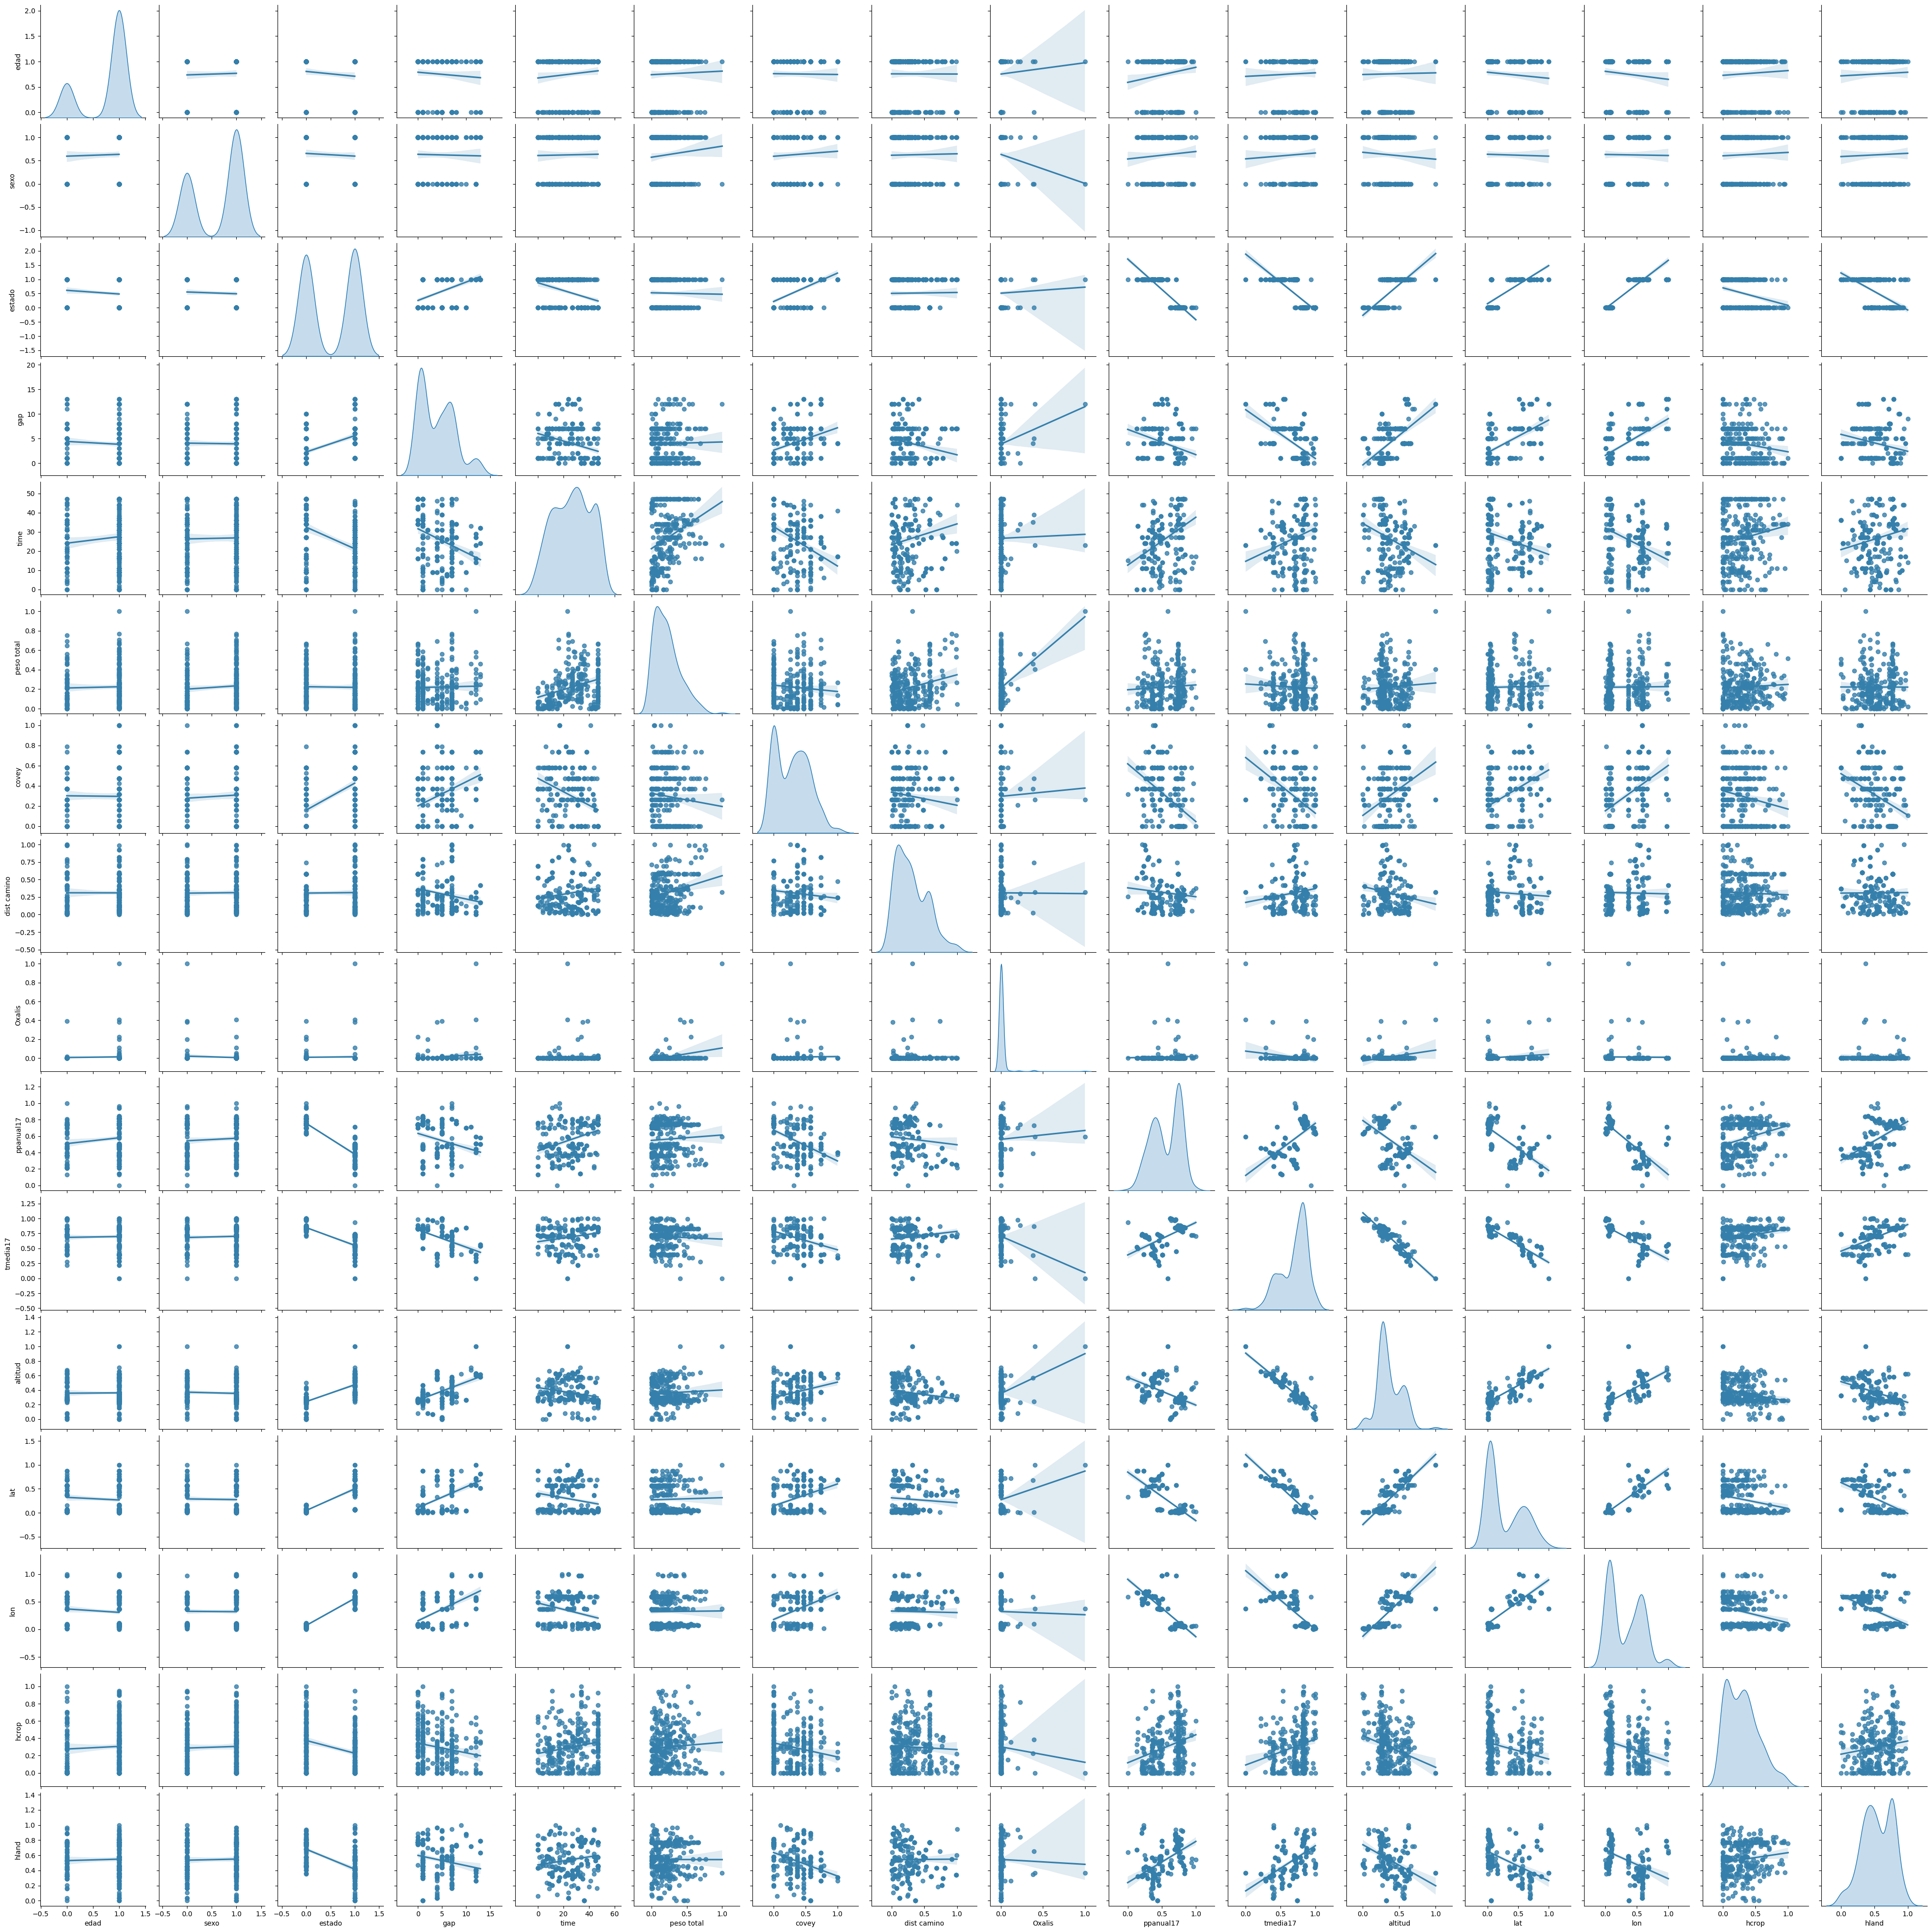

In [7]:
# Crear un pairplot con regresión para las columnas numéricas
color_main = '#347fab' 
pairplot = sns.pairplot(df[columnas_interes], kind='reg', diag_kind='kde', plot_kws={'color': color_main})
plt.show()

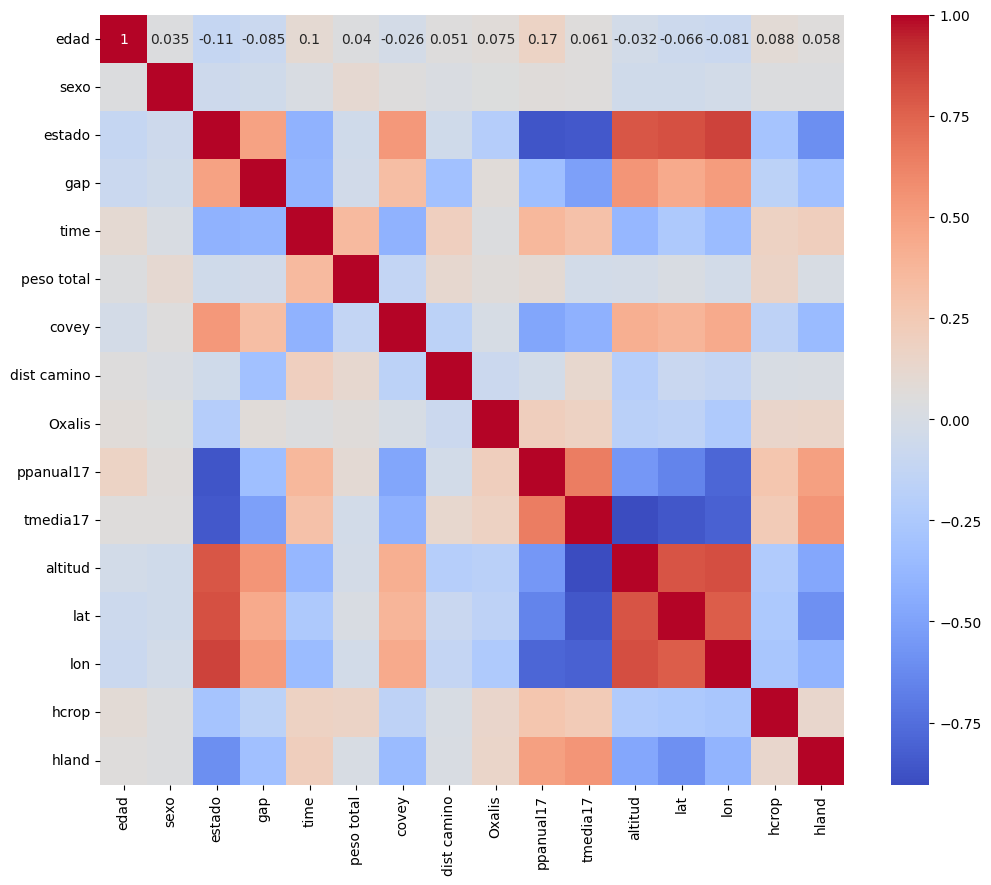

In [9]:
#columnas_interes = ['covey', 'edad', 'sexo', 'estado', 'gap', 'time', 'peso total', 'Oxalis', 
 #                   'dist camino', 'ppanual17', 'tmedia17', 'altitud', 'lat', 'lon', 'hcrop', 'hland']

# Crear un DataFrame con las variables de interés
df_heatmap = df[columnas_interes]

# Calcular la matriz de correlación
corr_matrix = df_heatmap.corr(method='spearman')

# Crear el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("")
plt.show()

[None, None]

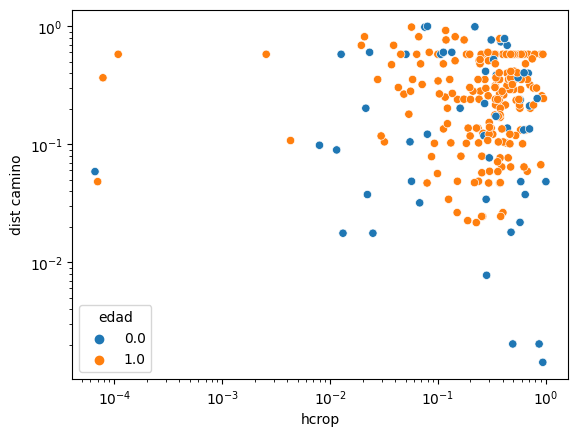

In [10]:
import seaborn as sns

g = sns.scatterplot(data=df, x='hcrop', y='dist camino', hue='edad')
g.set(xscale="log", yscale="log")

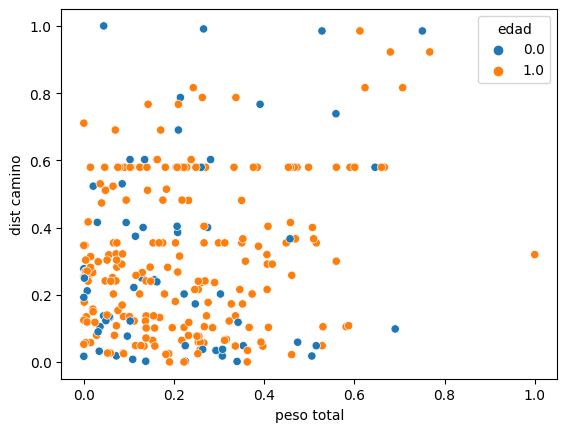

In [11]:
g= sns.scatterplot(data=df, x='peso total', y='dist camino', hue='edad')
#g.set(xscale="log", yscale="log")

[None]

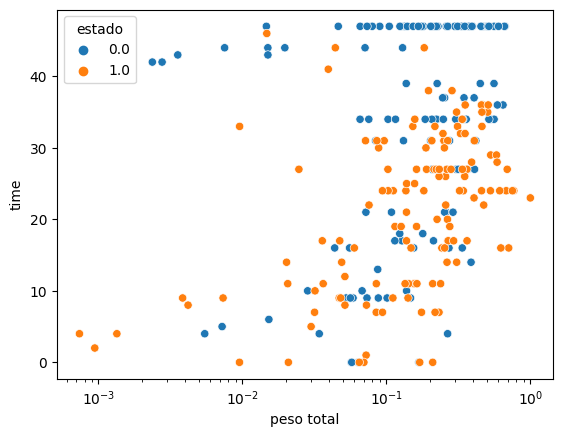

In [12]:
g = sns.scatterplot(data=df, x='peso total', y='time', hue='estado')
g.set(xscale="log")

[None, None]

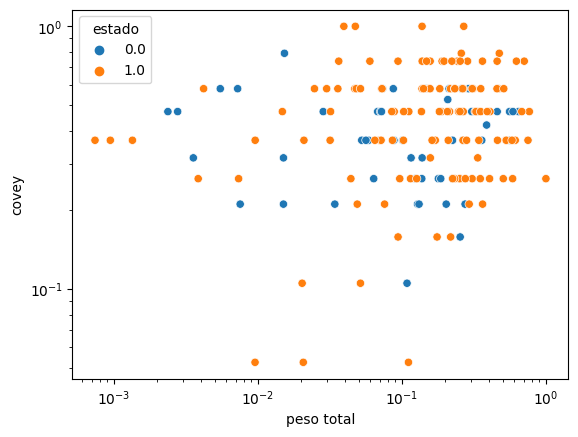

In [13]:
g = sns.scatterplot(data=df, x='peso total', y='covey', hue='estado')
g.set(xscale="log", yscale="log")

### Buscando explicabilidad con Random Forest

In [14]:
# Separar las variables predictoras de la variable objetivo
X = df.drop('hcrop', axis=1)
y = df['hcrop']

In [15]:
# Separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15 , random_state= 5 )

In [16]:
# Definir el modelo
rf = RandomForestRegressor(n_jobs=-1, n_estimators=500, random_state=5)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf.predict(X_test)

# Evaluar el modelo
mse = MSE(y_test, y_pred)
print('MSE: {:.3f}'.format(mse))

score = rf.score(X_test, y_test)
print('Score (R2): {:.3f}'.format(score))

MSE: 0.057
Score (R2): 0.064


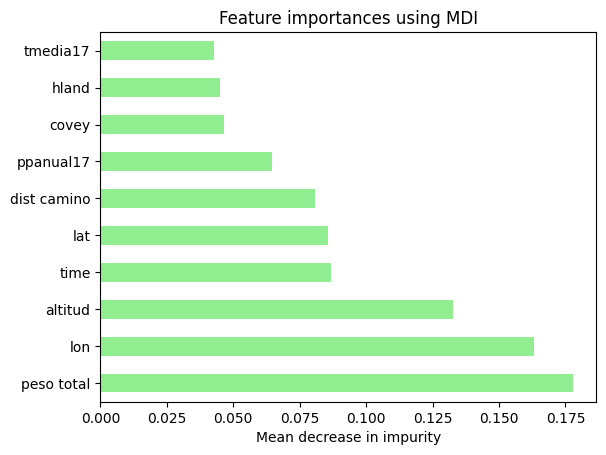

In [17]:
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)

# Sort importances_rf
importances_rf_sorted = importances_rf.sort_values(ascending=False)
top_10_features = importances_rf_sorted.head(10)

# Make a horizontal bar plot
top_10_features.plot(kind='barh', color='lightgreen');
plt.title("Feature importances using MDI")
plt.xlabel("Mean decrease in impurity")
plt.show()